<img width=150 src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/NumPy_logo.svg/200px-NumPy_logo.svg.png"></img>

# NumPy 統計函式 Universal Functions (ufunc)


範例目標:<br>
實做
1. 順序統計量 (Order Statistics)
2. 平均數與變異數
3. 相關性
4. 直方圖 (Histogram)


範例重點:<br>
1. 統計函式也須注意針對計算的軸 (axis) 與維度 (dimension) 
2. 直方圖 (Histogram) 需要配合套件 matplotlib.pyplot 使用

In [1]:
import numpy as np

## 1. 順序統計量 (Order Statistics)

### 1.1 最大值和最小值

在先前的單元中曾介紹過找出陣列中的最大值 (`ndarray.max()`, `np.amax()`) 和最小值 (`ndarray.min()`, `np.amin()`)，針對單一陣列中取得最大值或最小值。

在 NumPy 順序統計量的相關函式中，最大值與最小值相關的函式還有：
- `numpy.maximum()`, `numpy.minimum()`
- `numpy.fmax()`, `numpy.fmin()`
- `numpy.nanmax()`, `numpy.nanmin()`

In [2]:
np.random.seed(1)
a = np.random.randint(1, 10, 6).reshape(2, 3)
b = np.random.randint(1, 5, 3)

In [3]:
a

array([[6, 9, 6],
       [1, 1, 2]])

In [4]:
b

array([1, 4, 2])

#### 1.1.1 `numpy.maximum()`, `numpy.minimum()`

以 element-wise 比較 2 個陣列並回傳各元素的最大值或最小值。如果比較的元素中的 nan 的話，則會回傳 nan。

`maximum()` 與 `minimum()` 在進行比較時，若有需要會利用到廣播 (bradcasting)。

In [5]:
np.maximum(a, b)

array([[6, 9, 6],
       [1, 4, 2]])

In [6]:
np.minimum(a, b)

array([[1, 4, 2],
       [1, 1, 2]])

In [7]:
np.maximum(a, [np.nan, 0, np.nan])

array([[nan,  9., nan],
       [nan,  1., nan]])

#### 1.1.2 `numpy.fmax()`, `numpy.fmin()`

以 element-wise 比較 2 個陣列並回傳各元素的最大值或最小值。與 `maximum()` / `minimum()` 不同的是，如果比較的元素中只有一個是 nan 的話，回傳非 nan 的值，如果兩個元素都是 nan 則回傳 nan。

同樣在進行比較時，若有需要會利用到廣播 (bradcasting)。

In [8]:
np.fmax(a, b)

array([[6, 9, 6],
       [1, 4, 2]])

In [9]:
np.fmin([np.nan, 3, np.nan], [np.nan, np.nan, np.nan])

array([nan,  3., nan])

#### 1.1.3 `numpy.nanmax()`, `numpy.nanmin()`

回傳陣列中有非 nan 元素值的最大值或最小值。

可以指定要比較的軸，以及回傳值是否要保留維度。常用語法如下：

```python
numpy.nanmax(a, axis=None, keepdims=<no value>)
numpy.nanmin(a, axis=None, keepdims=<no value>)
```

In [10]:
np.nanmax([1, 2, np.nan, 3])

3.0

如果元素中都是 nan 值則會產生 RuntimeWarning。

In [11]:
np.nanmax([np.nan, np.nan])

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: All-NaN axis encountered
  """Entry point for launching an IPython kernel.


nan

### 1.2 百分位數：`percentile()`, `nanpercentile()`

計算百分位數，`percentile()` 與 `nanpercentile()` 不同的地方在於後者會忽略 nan。

欲取得的百分位數引數，可以傳入純量或是陣列的值 (介於0 - 100 之間)，也可以指定要比較的軸，以及回傳值是否要保留維度。常用語法如下：

```python
numpy.percentile(a, q, axis=None, keepdims=<no value>)
numpy.nanpercentile(a, q, axis=None, keepdims=<no value>)
```

In [12]:
p = np.arange(1, 20).astype('float32')
p

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19.], dtype=float32)

In [13]:
np.percentile(p, [30, 60])

array([ 6.4, 11.8])

In [14]:
np.percentile(p, 50)

10.0

In [15]:
p[5] = np.nan
p[9] = np.nan
p[15] = np.nan

In [16]:
p

array([ 1.,  2.,  3.,  4.,  5., nan,  7.,  8.,  9., nan, 11., 12., 13.,
       14., 15., nan, 17., 18., 19.], dtype=float32)

In [17]:
np.nanpercentile(p, 50)

10.0

如果元素中包含 nan 的話，則 `percentile()` 會回傳 nan。

In [18]:
np.percentile(p, 50)

nan

### 1.3 分位數：`quantile()`, `nanquantile()`

計算分位數，`quantile()` 與 `nanquantile()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `quantile()` 會回傳 nan。

欲取得的分位數引數，可以傳入純量或是陣列的值 (介於0 - 1 之間)，也可以指定要比較的軸，以及回傳值是否要保留維度。常用語法如下：

```python
numpy.quantile(a, q, axis=None, keepdims=<no value>)
numpy.nanquantile(a, q, axis=None, keepdims=<no value>)
```

In [19]:
q = np.array([23,  2,  1, 18,  9, 25, 14, 48, 43,  9, 31,  8,  4,  7, 22,  4,  5, 25, 44, 13])
q

array([23,  2,  1, 18,  9, 25, 14, 48, 43,  9, 31,  8,  4,  7, 22,  4,  5,
       25, 44, 13])

In [20]:
np.quantile(q, 0.25)

6.5

In [21]:
q = np.array([23,  2,  1, np.nan,  9, 25, np.nan, 48, 43,  9, 31,  np.nan,  4,  7, np.nan,  4,  5, 25, 44, 13]).reshape(5, 4)
q

array([[23.,  2.,  1., nan],
       [ 9., 25., nan, 48.],
       [43.,  9., 31., nan],
       [ 4.,  7., nan,  4.],
       [ 5., 25., 44., 13.]])

下例是沿 axis 0 計算分位數，並且保留二維的維度。

In [22]:
np.nanquantile(q, 0.25, axis=0, keepdims=True)

array([[ 5. ,  7. , 16. ,  8.5]])

## 2. 平均數與變異數

### 2.1 平均值：`mean()`, `nanmean()`

`mean()` 和 `nanmean()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `mean()` 會回傳 nan。下面的例子使用 `np.isnan()` 判斷陣列中是否包含 nan，如果無 nan 的話就呼叫 `mean()` 計算平均值，反之則呼叫 `nanmean()` 進行計算。

可以指定要計算平均數的軸，以及回傳值是否要保留維度。`dtype` 引數是計算使用的型別，若輸入陣列是整數的話，則會用 `float64` 型別計算，若輸入的是浮點數的話，則是依輸入陣列的型別做為 `dtype`。

常用語法如下：

```python
numpy.mean(a, axis=None, dtype=None, keepdims=<no value>)
numpy.nanmean(a, axis=None, dtype=None, keepdims=<no value>)
```

In [23]:
a = np.array([23,  2,  1, np.nan,  9, 25, np.nan, 
              48, 43,  9, 31,  np.nan]).reshape(3, 4)

In [24]:
np.mean(a)

nan

In [25]:
if not np.isnan(np.sum(a)):
    print("陣列中無 nan，忽略 nan 後的平均值為：", np.mean(a))
else:
    print("陣列中有 nan，忽略 nan 後的平均值為：", np.nanmean(a))

陣列中有 nan，忽略 nan 後的平均值為： 21.22222222222222


### 2.2 平均值：`average()`

使用 `average()` 計算平均值的話，可以輸入權重值做為引數。

常用語法：
```python
numpy.average(a, axis=None, weights=None)
```

In [26]:
a = np.arange(6).reshape((3,2))
a

array([[0, 1],
       [2, 3],
       [4, 5]])

權重平均值的計算公式為：

> avg = sum(a * weights) / sum(weights)

In [27]:
np.average(a, axis=1, weights=[0.25, 0.75])

array([0.75, 2.75, 4.75])

須注意權重的總和不能為 0，否則會產生錯誤。

In [28]:
np.average(a, axis=1, weights=[0, 0])

ZeroDivisionError: Weights sum to zero, can't be normalized

### 2.3 計算中位數：`median()`, `nanmedian()`

`median()` 和 `nanmedian()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `median()` 會回傳 nan。

可以指定要計算中位數的軸，以及回傳值是否要保留維度。要留意的是，如果軸或是陣列總數不是單數的話，中位數的值會是中間 2 個元素值相加除以 2。

常用語法如下：

```python
numpy.median(a, axis=None, keepdims=False)
numpy.nanmedian(a, axis=None, keepdims=False)
```

In [29]:
np.random.seed(5)
m = np.random.randint(1, 50, 15).reshape(3, 5)
m

array([[36, 15, 48, 39, 17],
       [10,  9, 37, 40, 28],
       [49, 31, 17,  8, 13]])

In [30]:
np.median(m, axis=1)

array([36., 28., 17.])

In [31]:
np.nanmedian(np.array([[36, 15, np.nan, 39, 17],
                       [np.nan,  9, 37, np.nan, 28],
                       [49, np.nan, 17,  8, 13]]), axis=1)

array([26.5, 28. , 15. ])

### 2.4 計算標準差：`std()`, `nanstd()`

`std()` 和 `nanstd()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `std()` 會回傳 nan。

可以指定要計算標準差的軸，以及回傳值是否要保留維度。若是對於精度可能造成的誤差影響，可以改變 `dtype` 提高精度。

如果要計算樣本標準差的話，可將 `ddof` (自由度) 引數傳入 1，在計算平均方差 (mean squared deviation) 時分母就會以 N - ddof 做計算。

常用語法如下：

```python
numpy.std(a, axis=None, dtype=None, ddof=0, keepdims=<no value>)
numpy.nanstd(a, axis=None, dtype=None, ddof=0, keepdims=<no value>)
```

In [32]:
s = np.array([[1, 2], [3, 4]])
np.std(s)

1.118033988749895

### 2.5 計算變異數：`var()`, `nanvar()`

`var()` 和 `nanvar()` 不同的地方在於後者會忽略 nan。如果元素中包含 nan 的話，則 `var()` 會回傳 nan。

可以指定要計算變異數的軸，以及回傳值是否要保留維度。若是對於精度可能造成的誤差影響，可以改變 `dtype` 提高精度。

如果要計算樣本變異數的話，可將 `ddof` (自由度) 引數傳入 1，在計算平均方差 (mean squared deviation) 時分母就會以 N - ddof 做計算。

常用語法如下：

```python
numpy.var(a, axis=None, dtype=None, ddof=0, keepdims=<no value>)
numpy.nanvar(a, axis=None, dtype=None, ddof=0, keepdims=<no value>
```

In [33]:
v = np.array([[1, 2], [3, 4]])
np.var(a)

2.9166666666666665

In [34]:
np.var(a, axis=0)

array([2.66666667, 2.66666667])

In [35]:
np.var(a, axis=1)

array([0.25, 0.25, 0.25])

## 3. 相關性

### 3.1 相關係數：`corrcoef()`

`corrcoef()` 計算 Pearson 積差相關係數。引數 `rowvar` 預設值為 `True`，代表將每一個 row 當做是一筆變數。

語法如下：

```python
numpy.corrcoef(x, y=None, rowvar=True)
```

In [37]:
x = np.random.randint(1, 20, 10).reshape(2, 5)
x

array([[10, 11, 10, 10,  2],
       [19,  8, 17, 15,  6]])

In [38]:
np.corrcoef(x)   
# [row1|row1, row1|row2]
# [row2|row1, row2|row2]

array([[1.        , 0.60204501],
       [0.60204501, 1.        ]])

### 3.2 互相關 (Cross-correlation)：`correlate()`

計算 2 個一維序列的互相關。`mode` 引數及回傳序列形狀如下表：

|mode|回傳序列形狀|
|---|---|
|valid|max(M, N)|
|full|(N+M-1,)|
|same|max(M, N) - min(M, N) + 1|

_N 為第1個序列的元素數，M為第2個序列的元素數。_

`correlate()` 語法如下：
```python
numpy.correlate(a, v, mode='valid')
```

In [39]:
np.correlate([1, 2, 3], [0, 1])

array([2, 3])

### 3.3 共變異數：`cov()`

引數說明如下：

|引數|說明|
|---|---|
|m|一維或二維陣列|
|y|額外資料，形狀須與m相同|
|rowvar|每一個 row 當做是一筆變數，預設值為 True|
|bias|樣本共變異數的話設為 False (預設值)，母體設為 True|
|ddof|自由度，預設值為 None|
|fweights|頻率加權，預設值為 None|
|aweights|觀測向量加權，預設值為 None|

語法如下：
```python
numpy.cov(m, y=None, rowvar=True, bias=False, ddof=None, fweights=None, aweights=None)
```

In [40]:
x = np.array([[0, 1, 2],
              [2, 1, 0]])

np.cov(x)

array([[ 1., -1.],
       [-1.,  1.]])

## 4. Histogram

NumPy 提供 `np.histogram()` 函式來計算 histogram，基本語法如下：

```python
numpy.histogram(a, bins=10, range=None, normed=None, weights=None, density=None)
```

|引數|說明|
|---|---|
|a|輸入陣列|
|bins|bins的定義，可傳入純量、序列、或是不同的方法 (例如：auto)|
|range|bins的範圍，預設是 a.min() 與 a.max() 之間，或是依照傳入的範圍|
|weights|權重值，陣列形狀須與a相同|
|density|False：回傳各bin的count<br />True：回傳各bins的probability density|

下面的例子是隨機產生包含 100 個 0 - 9 數字的二維陣列，計算 histogram。

In [41]:
a = np.random.randint(0, 10, 100).reshape(10, 10)
a

array([[0, 0, 4, 4, 9, 3, 2, 4, 6, 9],
       [3, 3, 2, 1, 5, 7, 4, 3, 1, 7],
       [3, 1, 9, 5, 7, 0, 9, 6, 0, 5],
       [2, 8, 6, 8, 0, 5, 2, 0, 7, 7],
       [6, 0, 0, 8, 5, 5, 9, 6, 4, 5],
       [2, 8, 8, 1, 6, 3, 4, 1, 8, 0],
       [2, 2, 4, 1, 6, 3, 4, 3, 1, 4],
       [2, 3, 4, 9, 4, 0, 6, 6, 9, 2],
       [9, 3, 0, 8, 8, 9, 7, 4, 8, 6],
       [8, 0, 5, 3, 4, 0, 2, 2, 1, 1]])

In [42]:
hist, bin_edges = np.histogram(a, bins=9)
hist, bin_edges

(array([13,  9, 11, 11, 13,  8, 10,  6, 19]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]))

比較 `histogram()` 的結果與實際元素值的 count，下面的範例使用 `np.unique()` 來得到所有出現過的值與其 count (出現的次數)。

In [43]:
unique, counts = np.unique(a, return_counts=True)

In [44]:
unique, counts

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([13,  9, 11, 11, 13,  8, 10,  6, 10,  9]))

若使用資料視覺化進行比較並觀察其分佈，可以產出下面的圖表，其結果與上面使用 `np.histogram()` 產生的數值是完全相同的。

有關於 Matplotlib 的功能，會在後續資料視覺化的單元進行詳細介紹。

(array([13.,  9., 11., 11., 13.,  8., 10.,  6., 19.]),
 array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <BarContainer object of 9 artists>)

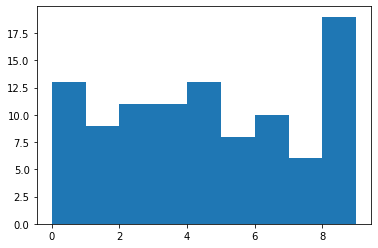

In [45]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(a.reshape(-1), bins=9)

## 5. `digitize()`

`digitize()` 是用來將連續數值離散化的函式，傳入陣列及 bins (必須為一維陣列)，得到輸入陣的各元素值是屬於哪一個 bins，並回傳對應的 bin 索引。

語法如下：
```python
numpy.digitize(x, bins, right=False)
```

其中引數 `right` 的傳入值影響到是否包含 bin 的左或右邊界，符合下列條件則 x 屬於 $i^{th}$ bin：

|bins元素排序|引數值|說明|
|---|---|---|
|漸增|right=False|包含左邊界但不包含右邊界<br />bins[i-1] <= x < bins[i]|
|漸增|right=True|不包含左邊界但包含右邊界<br />bins[i-1] < x <= bins[i]|
|漸減|right=False|包含左邊界但不包含右邊界<br />bins[i-1] > x >= bins[i]|
|漸減|right=True|不包含左邊界但包含右邊界<br />bins[i-1] >= x > bins[i]|

In [46]:
x = np.array([0.5, 6.2, 3.0, 1.7])
bins = np.array([0.0, 1.0, 2.5, 4.0, 10.0])

In [47]:
inds = np.digitize(x, bins)
inds

array([1, 4, 3, 2])